In [8]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
%conda install pandas

ERROR: Line magic function `%conda` not found.


In [27]:
import pandas

ImportError: No module named 'pandas'

In [9]:
train_x = np.linspace(1.0, 10.0, num = 100)[:, np.newaxis]
train_y = np.sin(train_x) + 0.1* np.power(train_x, 2) + 0.5 + np.random.randn(100, 1)

with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]
    

In [35]:
# Task 3
# get Euclidean distance

def getEucDist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def getEucDistAll(vecToClass, vecLabel, resp):
    arr = [] 
    for idx, val in enumerate(x):
        arr.append([getEucDist(val, x_eval[1]), t[idx][0]])
        # arr.append(getEucDist(val, x_eval[1]))
    return arr

In [36]:
eucDists = getEucDistAll(x[1], x, t)
eucDists.sort(key=lambda x: x[0])
ed = np.asarray(eucDists)

In [64]:
ed[:,0]




array([ 1.13070774,  1.20469913,  1.3181047 ,  1.37375398,  1.50562279,
        1.55267511,  1.56735446,  1.57578552,  1.6011246 ,  1.63193137,
        1.65387424,  1.65822194,  1.65903586,  1.66706329,  1.67725967,
        1.69770433,  1.72838075,  1.75610364,  1.7583515 ,  1.76357591,
        1.76428456,  1.76748409,  1.77547177,  1.77901658,  1.79593987,
        1.80091643,  1.80612846,  1.81179469,  1.81686543,  1.82211416,
        1.85550532,  1.88475463,  1.89560017,  1.89897341,  1.91934885,
        1.92301846,  1.92626582,  1.93540693,  1.93951025,  1.95007692,
        1.9515891 ,  1.95634864,  1.96484096,  1.96522263,  1.97544932,
        1.97570241,  1.97974746,  1.98113604,  1.98378426,  1.99341416,
        2.0030976 ,  2.01213817,  2.01419959,  2.0179445 ,  2.04494499,
        2.04543394,  2.04843843,  2.05009756,  2.05092662,  2.05433688,
        2.05533452,  2.05601556,  2.06157707,  2.06254697,  2.06518764,
        2.07258293,  2.08609683,  2.08947362,  2.09873772,  2.10

<function matplotlib.pyplot.show>

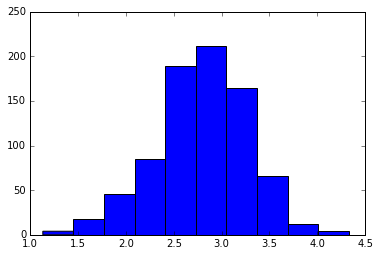

In [65]:
plt.hist(ed[:,0])
plt.show

In [71]:
np.count_nonzero(ed[0:200,1])

38